<a href="https://colab.research.google.com/github/Sharon-Mukami/Phase_1-DataAnalysis-Project/blob/main/Phase_1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Analysis I (Exploratory Data Analysis) - Exercise 1

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft.

> **Problem Statement:** You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor.

>You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

### b) Defining the Metric for Success
Inorder to aid the company in venturing into the aviation industry,an analysis must be conducted on previous records to establish the **aircrafts to purchase** as well their **proneness to risks**.

### c) Understanding the context
The data provided is:The NTSB aviaton accident database that cointains information from 1902 and later about civil aviation accidents and selected incidents within The US,its territories and possessions, and in international waters.

[The dataset](hthttps://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopsestps://)

### d) Recording the Experimental Design
Throughout this notebook we will be exploring two csv files and taking them through the processes of Data Cleaning,wrangling,exploring and visualization.

### e) Data Relevance
The dataset is relevant for improving quality and safety of travelling by Airplane- through exploring accidents cases of different aircrafts and providing meaningful insights and recommendations.

#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Reading the Data

In [4]:
aviation_data=pd.read_csv('/content/AviationData.csv',encoding='latin1',dtype='unicode')

In [5]:
aviation_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0,1,0,0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0,0,0,1,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0,0,0,0,NaN,NaN,NaN,NaN


In [6]:
state_codes_data=pd.read_csv('/content/USState_Codes.csv')

In [7]:
state_codes_data

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
...,...,...
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO




## 3. Checking the Data

In [8]:
# Determining the no. of records in our dataset
aviation_data.shape
# The aviation data has 88,889 rows and 31 columns

(88889, 31)

In [9]:
state_codes_data.shape
# The states codes data has 62 rows and 2 columns

(62, 2)

In [10]:
# Previewing the top of our dataset
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16-04-1980


In [11]:
state_codes_data.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [12]:
# Previewing the bottom of our dataset
aviation_data.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0,1,0,0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0,0,0,1,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0,0,0,0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0,1,0,1,NaN,NaN,NaN,30-12-2022


In [13]:
state_codes_data.tail()

,US_State,Abbreviation
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO
61,Pacific ocean,PO


In [14]:
# Checking whether each column has an appropriate datatype
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88889 non-null  object
 1   Investigation.Type      88889 non-null  object
 2   Accident.Number         88889 non-null  object
 3   Event.Date              88889 non-null  object
 4   Location                88837 non-null  object
 5   Country                 88663 non-null  object
 6   Latitude                34382 non-null  object
 7   Longitude               34373 non-null  object
 8   Airport.Code            50132 non-null  object
 9   Airport.Name            52704 non-null  object
 10  Injury.Severity         87889 non-null  object
 11  Aircraft.damage         85695 non-null  object
 12  Aircraft.Category       32287 non-null  object
 13  Registration.Number     87507 non-null  object
 14  Make                    88826 non-null  object
 15  Mo

In [15]:
state_codes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [16]:
aviation_data.describe()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,...,82697,16648,77488,76379,76956,82977,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25589,27154,10374,24870,...,26,13590,125,50,57,379,4,12,17074,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,0,0,0,0,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,49448,258,59675,63289,61454,29879,77303,15428,61754,17019


## 5. Tidying the Dataset
From the bit of exploring above, it seems like the aviation data needs to be cleaned and sorted out for it to be used for further study and visualization.

#####First we'll start by calling out all the columns and dropping those that won't be used in our study

In [17]:
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

#####Since our goal is to determine which aircrafts are low risks we will drop columns that are not related to the goal.

In [18]:
columns_to_drop=['Event.Id','Investigation.Type','Accident.Number','Airport.Code','Airport.Name','Registration.Number','FAR.Description','Schedule','Air.carrier','Publication.Date']
aviation_data2=aviation_data.drop(columns_to_drop,axis=1)
aviation_data2.head()

,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,NaN,Stinson,108-3,...,1,Reciprocating,Personal,2,0,0,0,UNK,Cruise,Probable Cause
1,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,NaN,Piper,PA24-180,...,1,Reciprocating,Personal,4,0,0,0,UNK,Unknown,Probable Cause
2,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Fatal(3),Destroyed,NaN,Cessna,172M,...,1,Reciprocating,Personal,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,NaN,Rockwell,112,...,1,Reciprocating,Personal,2,0,0,0,IMC,Cruise,Probable Cause
4,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,NaN,Cessna,501,...,NaN,NaN,Personal,1,2,NaN,0,VMC,Approach,Probable Cause


In [19]:
aviation_data2['City']=aviation_data2['Location'].str.split(',').str[0]
aviation_data2['State']=aviation_data2['Location'].str.split(',').str[1]
aviation_data2['InjurySeverity.Type']=aviation_data2['Injury.Severity'].str.split('(').str[0]
aviation_data3=aviation_data2.drop(['Location','Injury.Severity'],axis=1)
aviation_data3.head()

,Event.Date,Country,Latitude,Longitude,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,City,State,InjurySeverity.Type
0,1948-10-24,United States,NaN,NaN,Destroyed,NaN,Stinson,108-3,No,1,...,2,0,0,0,UNK,Cruise,Probable Cause,MOOSE CREEK,ID,Fatal
1,1962-07-19,United States,NaN,NaN,Destroyed,NaN,Piper,PA24-180,No,1,...,4,0,0,0,UNK,Unknown,Probable Cause,BRIDGEPORT,CA,Fatal
2,1974-08-30,United States,36.922223,-81.878056,Destroyed,NaN,Cessna,172M,No,1,...,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,Saltville,VA,Fatal
3,1977-06-19,United States,NaN,NaN,Destroyed,NaN,Rockwell,112,No,1,...,2,0,0,0,IMC,Cruise,Probable Cause,EUREKA,CA,Fatal
4,1979-08-02,United States,NaN,NaN,Destroyed,NaN,Cessna,501,No,NaN,...,1,2,NaN,0,VMC,Approach,Probable Cause,Canton,OH,Fatal


In [20]:
aviation_data3.drop_duplicates(inplace=True)

In [21]:
aviation_data3.isna().sum()

Event.Date                    0
Country                     226
Latitude                  54482
Longitude                 54491
Aircraft.damage            3191
Aircraft.Category         56577
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6080
Engine.Type                7093
Purpose.of.flight          6189
Total.Fatal.Injuries      11398
Total.Serious.Injuries    12503
Total.Minor.Injuries      11926
Total.Uninjured            5908
Weather.Condition          4490
Broad.phase.of.flight     27161
Report.Status              6381
City                         52
State                       558
InjurySeverity.Type         998
dtype: int64

In [22]:
aviation_data4=aviation_data3.replace(np.nan,value='Unknown')
aviation_data4.head()

,Event.Date,Country,Latitude,Longitude,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,City,State,InjurySeverity.Type
0,1948-10-24,United States,Unknown,Unknown,Destroyed,Unknown,Stinson,108-3,No,1,...,2,0,0,0,UNK,Cruise,Probable Cause,MOOSE CREEK,ID,Fatal
1,1962-07-19,United States,Unknown,Unknown,Destroyed,Unknown,Piper,PA24-180,No,1,...,4,0,0,0,UNK,Unknown,Probable Cause,BRIDGEPORT,CA,Fatal
2,1974-08-30,United States,36.922223,-81.878056,Destroyed,Unknown,Cessna,172M,No,1,...,3,Unknown,Unknown,Unknown,IMC,Cruise,Probable Cause,Saltville,VA,Fatal
3,1977-06-19,United States,Unknown,Unknown,Destroyed,Unknown,Rockwell,112,No,1,...,2,0,0,0,IMC,Cruise,Probable Cause,EUREKA,CA,Fatal
4,1979-08-02,United States,Unknown,Unknown,Destroyed,Unknown,Cessna,501,No,Unknown,...,1,2,Unknown,0,VMC,Approach,Probable Cause,Canton,OH,Fatal


In [23]:
aviation_data4.isna().sum()

Event.Date                0
Country                   0
Latitude                  0
Longitude                 0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
City                      0
State                     0
InjurySeverity.Type       0
dtype: int64

#####From the observation above,we opted to replacing all null values in the dataset as their is a variation of the number of missing values in the columns and it is not advisable to drop the rows and or columns.

In [24]:
aviation_data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88857 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Date              88857 non-null  object
 1   Country                 88857 non-null  object
 2   Latitude                88857 non-null  object
 3   Longitude               88857 non-null  object
 4   Aircraft.damage         88857 non-null  object
 5   Aircraft.Category       88857 non-null  object
 6   Make                    88857 non-null  object
 7   Model                   88857 non-null  object
 8   Amateur.Built           88857 non-null  object
 9   Number.of.Engines       88857 non-null  object
 10  Engine.Type             88857 non-null  object
 11  Purpose.of.flight       88857 non-null  object
 12  Total.Fatal.Injuries    88857 non-null  object
 13  Total.Serious.Injuries  88857 non-null  object
 14  Total.Minor.Injuries    88857 non-null  object
 15  Total.U

## 6. Exploratory Analysis

####Since,we have gotten rid of mising values, we will go ahead and explore the dataset while answering our hypothesis questions so as to gain meaningful insights in the dataset.

## 1.Number of Accidents per Country.
#####We have to count the number of accidents per country and Plot the distribution of accidents in different countries.

In [25]:
accidents=aviation_data4['Country'].groupby(aviation_data4['Country']).count()
sorted_accidents=accidents.sort_values(ascending=False)
sorted_accidents

Country
United States     82220
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
                  ...  
Sierra Leone          1
Corsica               1
Chad                  1
St Lucia              1
Liberia               1
Name: Country, Length: 219, dtype: int64

In [26]:
# Since the highest value for the number of accidents is 82,000, it will be impossible to plot all 219 accients on one bar graph. Therefore we will plot acccidents with a count of 200 and above
accidents_Count = accidents[aviation_data4['Country'].groupby(aviation_data4['Country']).count() > 200]
sorted_accidents_Count=accidents_Count.sort_values(ascending=False)
sorted_accidents_Count

Country
United States     82220
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Australia           300
France              236
Unknown             229
Spain               226
Bahamas             216
Germany             215
Name: Country, dtype: int64

##Distribution of Accidents in different Countries

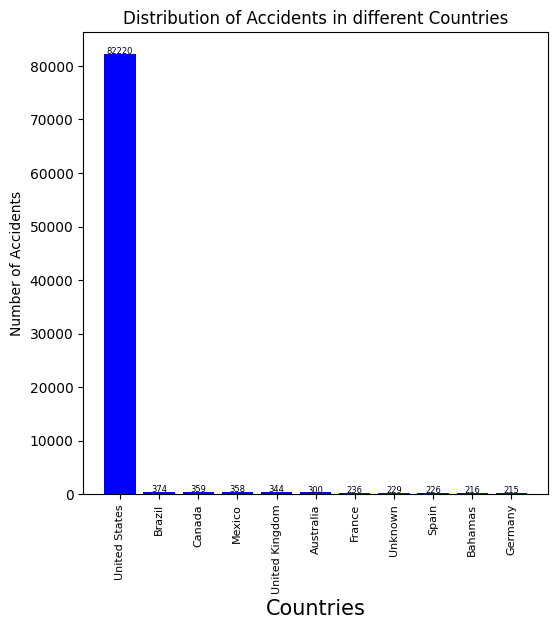

In [27]:
figure,ax=plt.subplots(figsize=(6,6))
accidents_Count_df = pd.DataFrame({'Country':sorted_accidents_Count.index,'Count':sorted_accidents_Count.values})
ax.bar(accidents_Count_df['Country'],accidents_Count_df['Count'], color='blue')
ax.set_xlabel('Countries',size=15)
plt.setp(ax.get_xticklabels(),rotation=90,size=8)
ax.set_ylabel('Number of Accidents')
y=accidents_Count_df['Count']
for i,v in enumerate(y):
    plt.text(x=i, y=v, s=str(v), horizontalalignment='center', size=6)
ax.set_title('Distribution of Accidents in different Countries');


## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
#

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?